<h3><b>This notebook contains the generalized mixed effects models for the perseverative errors video ratings sensitivity analysis</b></h3>
<p>It details the both the model selection procedure and the final hypothesis test</p>
<li>Selecting best fitting probability function for the generalized model (gamma or inverse gaussian)
<li>Selecting the best fitting link function for the model (log, identity or inverse)
<li>Selecting the best fitting random effects structure for the model (random intercepts and by-participant random slopes - as was done in the original analyses)
<li>Selecting the best fitting covariate structure (age, sex, working memory)
<p>This will be done by comparing model fit with BIC scores (as before)</p>
<p>Results will then be reported for only the <b>best fitting model</b></p>
<br>
<p>NB this notebook is run in r (rather than python - as previous analysis notebooks were) - due to better implementation of generalized mixed effects models in r </p>

In [2]:
library(tidyverse, quietly=TRUE)
library(lme4, quietly=TRUE)
library(ggplot2, quietly=TRUE)
task_summary <- read.csv("U:/Documents/Disgust learning project/github/disgust_reversal_learning-final/csvs/sensitivity_df.csv")

In [3]:
#transform variable to all be above 0
task_summary$pos_perseverative_er <- task_summary$mean_perseverative_er + 0.01 ##+0.01 as all values must be positive (i.e., can't have 0s)

Determine best link and probability function for this model
<p>NB commented out models did not converge

In [4]:
##firstly we test whether model should use a gamma or inverse gaussian probability function
##and whether the link function should be identity or inverse
gamma_log <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no), data=task_summary, family=Gamma(link="log"))
gamma_inverse <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no), data=task_summary, family=Gamma(link="inverse"))
gamma_identity <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no), data=task_summary, family=Gamma(link="identity"))

#invgaus_log <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no), data=task_summary, family=inverse.gaussian(link="log"))
invgaus_inverse <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no), data=task_summary, family=inverse.gaussian(link="inverse"))
#invgaus_identity <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no), data=task_summary, family=inverse.gaussian(link="identity"))

boundary (singular) fit: see help('isSingular')



                       Model      BIC
2            Gamma (inverse) 1359.637
1                Gamma (log) 1360.809
3           Gamma (identity) 1361.214
4 Inverse.gaussian (inverse) 2485.669


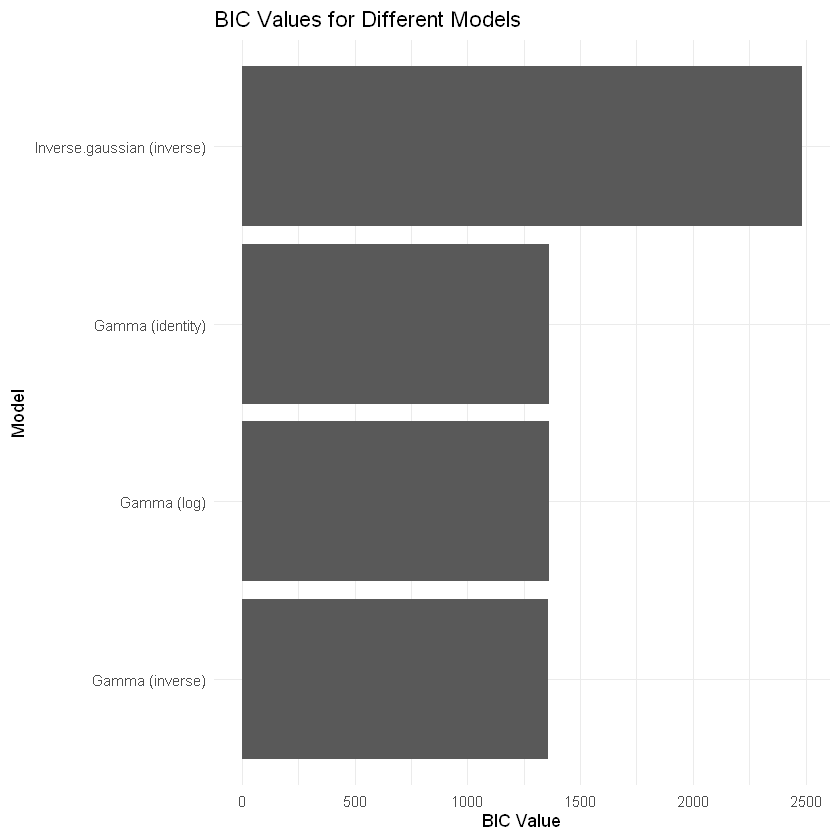

In [5]:
bic_values <- c(
  BIC(gamma_log),
  BIC(gamma_inverse), 
  BIC(gamma_identity),
  BIC(invgaus_inverse)
)
model_names <- c("Gamma (log)", "Gamma (inverse)", "Gamma (identity)", "Inverse.gaussian (inverse)" )

bic_df <- data.frame(Model = model_names, BIC = bic_values)

bic_df <- bic_df[order(bic_df$BIC), ]

# Plot the BIC values
ggplot(bic_df, aes(x = reorder(Model, BIC), y = BIC)) +
  geom_bar(stat = "identity") + 
  labs(title = "BIC Values for Different Models",
       x = "Model",
       y = "BIC Value") +
  theme_minimal() +
  coord_flip() 
print(bic_df)

Use this model and determine best random effects structure (as done before with linear mixed effects models in the python notebooks)

In [6]:
basic_model <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no), data=task_summary, family=Gamma(link="inverse"))

#feedback_randint <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no) + (1|feedback_details), data=task_summary, family=Gamma(link="inverse"))
#fractals_randint <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no) + (1|fractals), data=task_summary, family=Gamma(link="inverse"))
#feedback_fractals_randint <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no) + (1|fractals) + (1|feedback_details), data=task_summary, family=Gamma(link="inverse"))

#randslope <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (block_type|participant_no), data=task_summary, family=Gamma(link="inverse"))
#feedback_randint_randslope <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (block_type|participant_no) + (1|feedback_details), data=task_summary, family=Gamma(link="inverse"))
#feedback_fractals_randint_randslope <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (block_type|participant_no) + (1|feedback_details) + (1|fractals), data=task_summary, family=Gamma(link="inverse"))

In [7]:
##basic model is the only one that converges - so use this one

And now identify the best covariate structure

In [8]:
no_covariate <- basic_model
sex_covariate <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no) + prolific_sex, data=task_summary, family=Gamma(link="inverse"))
#age_covariate <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no) + prolific_age, data=task_summary, family=Gamma(link="inverse"))
digit_span_covariate <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no) + digit_span, data=task_summary, family=Gamma(link="inverse"))
#sex_age_covariate <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no) + prolific_sex + prolific_age, data=task_summary, family=Gamma(link="inverse"))
#sex_digit_span_covariate <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no) + prolific_sex + digit_span, data=task_summary, family=Gamma(link="inverse"))
#digit_span_age_covariate <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no) + prolific_age + digit_span, data=task_summary, family=Gamma(link="inverse"))
#sex_digit_span_age_covariate <- glmer(pos_perseverative_er ~ block_type + valence_diff + arousal_diff + valence_habdiff + (1|participant_no) + prolific_age + prolific_sex + digit_span, data=task_summary, family=Gamma(link="inverse"))

                 Model      BIC
1         no_covariate 1359.637
2        sex_covariate 1365.916
3 digit_span_covariate 1365.961


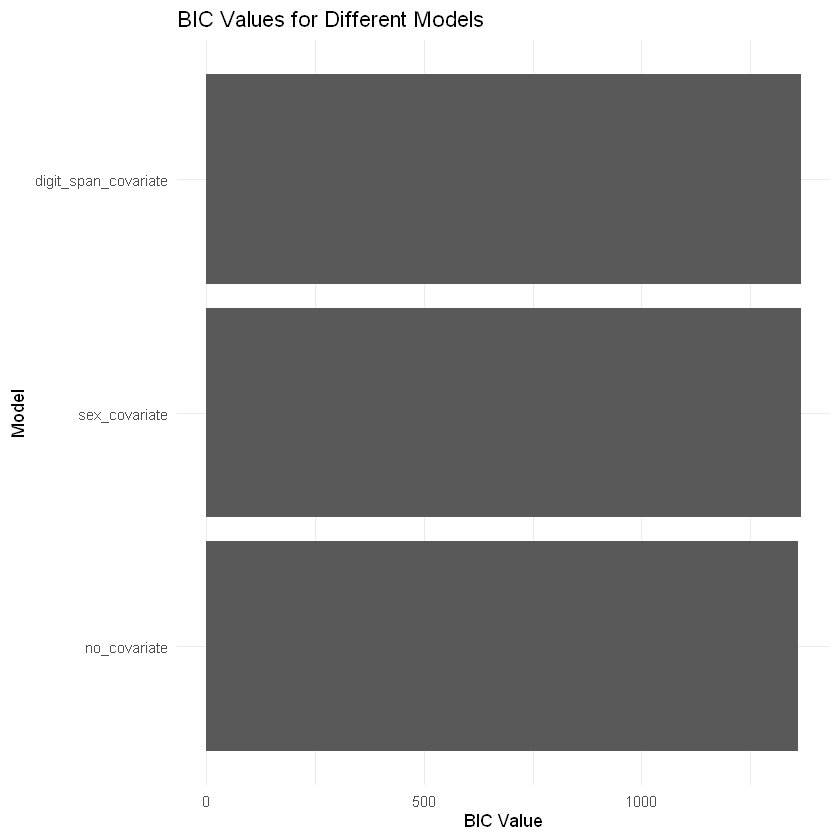

In [9]:
bic_values <- c(
  BIC(no_covariate),
  BIC(sex_covariate),
  BIC(digit_span_covariate)
)
model_names <- c("no_covariate", "sex_covariate", "digit_span_covariate")

bic_df <- data.frame(Model = model_names, BIC = bic_values)

bic_df <- bic_df[order(bic_df$BIC), ]

# Plot the BIC values
ggplot(bic_df, aes(x = reorder(Model, BIC), y = BIC)) +
  geom_bar(stat = "identity") + 
  labs(title = "BIC Values for Different Models",
       x = "Model",
       y = "BIC Value") +
  theme_minimal() +
  coord_flip() 
print(bic_df)

Hypothesis test with best fitting model

In [10]:
summary(no_covariate)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: Gamma  ( inverse )
Formula: pos_perseverative_er ~ block_type + valence_diff + arousal_diff +  
    valence_habdiff + (1 | participant_no)
   Data: task_summary

     AIC      BIC   logLik deviance df.resid 
  1320.5   1359.6   -652.3   1304.5      975 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.2794 -0.7259 -0.1786  0.6050  3.0781 

Random effects:
 Groups         Name        Variance Std.Dev.
 participant_no (Intercept) 0.06395  0.2529  
 Residual                   0.59502  0.7714  
Number of obs: 983, groups:  participant_no, 339

Fixed effects:
                 Estimate Std. Error t value Pr(>|z|)    
(Intercept)      1.466766   0.093922  15.617   <2e-16 ***
block_typeFear   0.001151   0.101617   0.011    0.991    
block_typePoints 0.046087   0.103220   0.446    0.655    
valence_diff     0.027701   0.028146   0.984    0.325    
arousal_diff     0.045818   0.0